<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Custom Training Loops in Keras**


Estimated time needed: **30** minutes


In this lab, you will learn to implement a basic custom training loop in Keras. 


## Objectives

By the end of this lab, you will: 

- Set up the environment 

- Define the neural network model 

- Define the Loss Function and Optimizer 

- Implement the custom training loop 

- Enhance the custom training loop by adding an accuracy metric to monitor model performance 

- Implement a custom callback to log additional metrics and information during training


----


## Step-by-Step Instructions:


### Exercise 1: Basic custom training loop: 

#### 1. Set Up the Environment:

- Import necessary libraries. 

- Load and preprocess the MNIST dataset. 


In [1]:
!pip install tensorflow numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 68.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 48.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.4 MB/s eta 0:00:00


In [3]:
import os
import warnings
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import Callback
import numpy as np

# Suppress all Python warnings
warnings.filterwarnings('ignore')

# Set TensorFlow log level to suppress warnings and info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
x_train, x_test = x_train / 255.0, x_test / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)


#### 2. Define the model: 

Create a simple neural network model with a Flatten layer followed by two Dense layers. 


In [4]:
# Step 2: Define the Model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])


#### 3. Define Loss Function and Optimizer: 

- Use Sparse Categorical Crossentropy for the loss function. 
- Use the Adam optimizer. 


In [5]:
# Step 3: Define Loss Function and Optimizer

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer = tf.keras.optimizers.Adam()


#### 4. Implement the Custom Training Loop: 

- Iterate over the dataset for a specified number of epochs. 
- Compute the loss and apply gradients to update the model's weights. 


In [6]:
# Step 4: Implement the Custom Training Loop

epochs = 2
# train_dataset = train_dataset.repeat(epochs)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
for epoch in range(epochs):
    print(f'Start of epoch {epoch + 1}')

    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)  # Forward pass
            loss_value = loss_fn(y_batch_train, logits)  # Compute loss

        # Compute gradients and update weights
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Logging the loss every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy()}')


Start of epoch 1
Epoch 1 Step 0: Loss = 2.428905963897705
Epoch 1 Step 200: Loss = 0.39243635535240173
Epoch 1 Step 400: Loss = 0.17183054983615875
Epoch 1 Step 600: Loss = 0.18859410285949707
Epoch 1 Step 800: Loss = 0.18477171659469604
Epoch 1 Step 1000: Loss = 0.4252595007419586
Epoch 1 Step 1200: Loss = 0.20113474130630493
Epoch 1 Step 1400: Loss = 0.25010278820991516
Epoch 1 Step 1600: Loss = 0.20249883830547333
Epoch 1 Step 1800: Loss = 0.19015295803546906


2025-03-04 13:36:05.496687: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Start of epoch 2
Epoch 2 Step 0: Loss = 0.08896055817604065
Epoch 2 Step 200: Loss = 0.17373313009738922
Epoch 2 Step 400: Loss = 0.09065383672714233
Epoch 2 Step 600: Loss = 0.06709770858287811
Epoch 2 Step 800: Loss = 0.11685469001531601
Epoch 2 Step 1000: Loss = 0.22509993612766266
Epoch 2 Step 1200: Loss = 0.08535180985927582
Epoch 2 Step 1400: Loss = 0.13548152148723602
Epoch 2 Step 1600: Loss = 0.14023704826831818
Epoch 2 Step 1800: Loss = 0.09223531186580658


2025-03-04 13:37:00.963891: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Exercise 2: Adding Accuracy Metric:

Enhance the custom training loop by adding an accuracy metric to monitor model performance. 

#### 1. Set Up the Environment: 

Follow the setup from Exercise 1. 


In [7]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Create a batched dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)


#### 2. Define the Model: 
Use the same model as in Exercise 1. 


In [8]:
# Step 2: Define the Model

model = Sequential([ 
    Flatten(input_shape=(28, 28)),  # Flatten the input to a 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(10)  # Output layer with 10 neurons for the 10 classes (digits 0-9)
])


#### 3. Define the loss function, optimizer, and metric: 

- Use Sparse Categorical Crossentropy for the loss function and Adam optimizer. 

- Add Sparse Categorical Accuracy as a metric. 


In [9]:
# Step 3: Define Loss Function, Optimizer, and Metric

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Loss function for multi-class classification
optimizer = tf.keras.optimizers.Adam()  # Adam optimizer for efficient training
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()  # Metric to track accuracy during training


#### 4. Implement the custom training loop with accuracy: 

Track the accuracy during training and print it at regular intervals. 


In [10]:
# Step 4: Implement the Custom Training Loop with Accuracy

epochs = 5  # Number of epochs for training

for epoch in range(epochs):
    print(f'Start of epoch {epoch + 1}')
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Compute predictions
            logits = model(x_batch_train, training=True)
            # Compute loss
            loss_value = loss_fn(y_batch_train, logits)
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Apply gradients to update model weights
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Update the accuracy metric
        accuracy_metric.update_state(y_batch_train, logits)

        # Log the loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy()} Accuracy = {accuracy_metric.result().numpy()}')
    
    # Reset the metric at the end of each epoch
    accuracy_metric.reset_state()


Start of epoch 1
Epoch 1 Step 0: Loss = 2.2686030864715576 Accuracy = 0.03125
Epoch 1 Step 200: Loss = 0.3515393137931824 Accuracy = 0.8350435495376587
Epoch 1 Step 400: Loss = 0.19776566326618195 Accuracy = 0.8679083585739136
Epoch 1 Step 600: Loss = 0.17220601439476013 Accuracy = 0.8837354183197021
Epoch 1 Step 800: Loss = 0.13083554804325104 Accuracy = 0.896691620349884
Epoch 1 Step 1000: Loss = 0.4188894033432007 Accuracy = 0.9034090638160706
Epoch 1 Step 1200: Loss = 0.14457967877388 Accuracy = 0.9096065759658813
Epoch 1 Step 1400: Loss = 0.2598384618759155 Accuracy = 0.9145699739456177
Epoch 1 Step 1600: Loss = 0.19589580595493317 Accuracy = 0.9178052544593811
Epoch 1 Step 1800: Loss = 0.13362674415111542 Accuracy = 0.9218142628669739
Start of epoch 2
Epoch 2 Step 0: Loss = 0.08986447006464005 Accuracy = 1.0
Epoch 2 Step 200: Loss = 0.1578063815832138 Accuracy = 0.9603545069694519
Epoch 2 Step 400: Loss = 0.08748961240053177 Accuracy = 0.9569825530052185
Epoch 2 Step 600: Loss = 

2025-03-04 13:40:04.531998: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Start of epoch 3
Epoch 3 Step 0: Loss = 0.041741110384464264 Accuracy = 1.0
Epoch 3 Step 200: Loss = 0.13975007832050323 Accuracy = 0.9743469953536987
Epoch 3 Step 400: Loss = 0.08783796429634094 Accuracy = 0.9725685715675354
Epoch 3 Step 600: Loss = 0.042844757437705994 Accuracy = 0.9737936854362488
Epoch 3 Step 800: Loss = 0.056785207241773605 Accuracy = 0.9745240211486816
Epoch 3 Step 1000: Loss = 0.1355559229850769 Accuracy = 0.9755244851112366
Epoch 3 Step 1200: Loss = 0.05670663341879845 Accuracy = 0.9759575128555298
Epoch 3 Step 1400: Loss = 0.08712360262870789 Accuracy = 0.9761108160018921
Epoch 3 Step 1600: Loss = 0.10618353635072708 Accuracy = 0.9759134650230408
Epoch 3 Step 1800: Loss = 0.040258489549160004 Accuracy = 0.976263165473938
Start of epoch 4
Epoch 4 Step 0: Loss = 0.027191421017050743 Accuracy = 1.0
Epoch 4 Step 200: Loss = 0.09671405702829361 Accuracy = 0.9810323119163513
Epoch 4 Step 400: Loss = 0.08293671160936356 Accuracy = 0.9805174469947815
Epoch 4 Step 600:

### Exercise 3: Custom Callback for Advanced Logging: 

Implement a custom callback to log additional metrics and information during training. 

#### 1. Set Up the Environment: 

Follow the setup from Exercise 1.


In [11]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Create a batched dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)


#### 2. Define the Model: 

Use the same model as in Exercise 1. 


In [12]:
# Step 2: Define the Model

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input to a 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(10)  # Output layer with 10 neurons for the 10 classes (digits 0-9)
])


#### 3. Define Loss Function, Optimizer, and Metric: 

- Use Sparse Categorical Crossentropy for the loss function and Adam optimizer. 

- Add Sparse Categorical Accuracy as a metric. 


In [13]:
# Step 3: Define Loss Function, Optimizer, and Metric

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Loss function for multi-class classification
optimizer = tf.keras.optimizers.Adam()  # Adam optimizer for efficient training
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()  # Metric to track accuracy during training


#### 4. Implement the custom training loop with custom callback: 

Create a custom callback to log additional metrics at the end of each epoch.


In [14]:
from tensorflow.keras.callbacks import Callback

# Step 4: Implement the Custom Callback 
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f'End of epoch {epoch + 1}, loss: {logs.get("loss")}, accuracy: {logs.get("accuracy")}')


In [15]:
# Step 5: Implement the Custom Training Loop with Custom Callback

epochs = 2
custom_callback = CustomCallback()  # Initialize the custom callback

for epoch in range(epochs):
    print(f'Start of epoch {epoch + 1}')
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Compute predictions
            logits = model(x_batch_train, training=True)
            # Compute loss
            loss_value = loss_fn(y_batch_train, logits)
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Apply gradients to update model weights
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Update the accuracy metric
        accuracy_metric.update_state(y_batch_train, logits)

        # Log the loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy()} Accuracy = {accuracy_metric.result().numpy()}')
    
    # Call the custom callback at the end of each epoch
    custom_callback.on_epoch_end(epoch, logs={'loss': loss_value.numpy(), 'accuracy': accuracy_metric.result().numpy()})
    
    # Reset the metric at the end of each epoch
    accuracy_metric.reset_state()  # Use reset_state() instead of reset_states()


Start of epoch 1
Epoch 1 Step 0: Loss = 2.289888620376587 Accuracy = 0.09375
Epoch 1 Step 200: Loss = 0.3680278956890106 Accuracy = 0.8333333134651184
Epoch 1 Step 400: Loss = 0.18024899065494537 Accuracy = 0.866583526134491
Epoch 1 Step 600: Loss = 0.25739917159080505 Accuracy = 0.8832154870033264
Epoch 1 Step 800: Loss = 0.15282343327999115 Accuracy = 0.8957163095474243
Epoch 1 Step 1000: Loss = 0.42680424451828003 Accuracy = 0.9025974273681641
Epoch 1 Step 1200: Loss = 0.16171634197235107 Accuracy = 0.9090861678123474
Epoch 1 Step 1400: Loss = 0.2632545828819275 Accuracy = 0.9142130613327026
Epoch 1 Step 1600: Loss = 0.2139626145362854 Accuracy = 0.9173953533172607
Epoch 1 Step 1800: Loss = 0.17573893070220947 Accuracy = 0.9211202263832092


2025-03-04 13:50:11.031141: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


End of epoch 1, loss: 0.04563339799642563, accuracy: 0.9231166839599609
Start of epoch 2
Epoch 2 Step 0: Loss = 0.07137185335159302 Accuracy = 1.0
Epoch 2 Step 200: Loss = 0.17205692827701569 Accuracy = 0.959266185760498
Epoch 2 Step 400: Loss = 0.10917454957962036 Accuracy = 0.9563590884208679
Epoch 2 Step 600: Loss = 0.049260079860687256 Accuracy = 0.9589226245880127
Epoch 2 Step 800: Loss = 0.06803486496210098 Accuracy = 0.9601669907569885
Epoch 2 Step 1000: Loss = 0.3081034719944 Accuracy = 0.9605082273483276
Epoch 2 Step 1200: Loss = 0.07969001680612564 Accuracy = 0.9615164399147034
Epoch 2 Step 1400: Loss = 0.18291153013706207 Accuracy = 0.9624598622322083
Epoch 2 Step 1600: Loss = 0.14809858798980713 Accuracy = 0.9625429511070251
Epoch 2 Step 1800: Loss = 0.10560812056064606 Accuracy = 0.9634925127029419
End of epoch 2, loss: 0.025905556976795197, accuracy: 0.9641666412353516


### Exercise 4: Add Hidden Layers 

Next, you will add a couple of hidden layers to your model. Hidden layers help the model learn complex patterns in the data. 


In [16]:
from tensorflow.keras.layers import Input, Dense

# Define the input layer
input_layer = Input(shape=(28, 28))  # Input layer with shape (28, 28)

# Define hidden layers
hidden_layer1 = Dense(64, activation='relu')(input_layer)  # First hidden layer with 64 neurons and ReLU activation
hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)  # Second hidden layer with 64 neurons and ReLU activation


In the above code: 

`Dense(64, activation='relu')` creates a dense (fully connected) layer with 64 units and ReLU activation function. 

Each hidden layer takes the output of the previous layer as its input.


### Exercise 5: Define the output layer 

Finally, you will define the output layer. Suppose you are working on a binary classification problem, so the output layer will have one unit with a sigmoid activation function. 


In [17]:
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

In the above code: 

`Dense(1, activation='sigmoid')` creates a dense layer with 1 unit and a sigmoid activation function, suitable for binary classification. 


### Exercise 6: Create the Model 

Now, you will create the model by specifying the input and output layers. 


In [18]:
model = Model(inputs=input_layer, outputs=output_layer)

In the above code: 

`Model(inputs=input_layer, outputs=output_layer)` creates a Keras model that connects the input layer to the output layer through the hidden layers. 


### Exercise 7: Compile the Model 

Before training the model, you need to compile it. You will specify the loss function, optimizer, and evaluation metrics. 


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In the above code: 

`optimizer='adam'` specifies the Adam optimizer, a popular choice for training neural networks. 

`loss='binary_crossentropy'` specifies the loss function for binary classification problems. 

`metrics=['accuracy']` tells Keras to evaluate the model using accuracy during training. 


### Exercise 8: Train the Model 

You can now train the model on some training data. For this example, let's assume `X_train` is our training input data and `y_train` is the corresponding labels. 


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Step 1: Redefine the Model for 20 features
model = Sequential([
    Input(shape=(20,)),  # Adjust input shape to (20,)
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer for binary classification with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 2: Generate Example Data
X_train = np.random.rand(1000, 20)  # 1000 samples, 20 features each
y_train = np.random.randint(2, size=(1000, 1))  # 1000 binary labels (0 or 1)

# Step 3: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4776 - loss: 0.7052  
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5300 - loss: 0.6908 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5407 - loss: 0.6865 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5436 - loss: 0.6869 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5663 - loss: 0.6826 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5464 - loss: 0.6871 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5624 - loss: 0.6804 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5493 - loss: 0.6824 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5523 - loss: 0.6838 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5383 - loss: 0.6844 


In the above code: 

`X_train` and `y_train` are placeholders for your actual training data. 

`model.fit` trains the model for a specified number of epochs and batch size. 


### Exercise 9: Evaluate the Model 

After training, you can evaluate the model on test data to see how well it performs. 


In [21]:
# Example test data (in practice, use real dataset)
X_test = np.random.rand(200, 20)  # 200 samples, 20 features each
y_test = np.random.randint(2, size=(200, 1))  # 200 binary labels (0 or 1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print test loss and accuracy
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4714 - loss: 0.7196  
Test loss: 0.7147642374038696
Test accuracy: 0.4749999940395355


In the above code: 

`model.evaluate` computes the loss and accuracy of the model on test data. 

`X_test` and `y_test` are placeholders for your actual test data. 


## Practice Exercises 

### Exercise 1: Basic Custom Training Loop 

#### Objective: Implement a basic custom training loop to train a simple neural network on the MNIST dataset. 

#### Instructions: 

- Set up the environment and load the dataset. 

- Define the model with a Flatten layer and two Dense layers. 

- Define the loss function and optimizer. 

- Implement a custom training loop to iterate over the dataset, compute the loss, and update the model's weights. 


In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import Callback

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a batched dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# Define a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),  # First hidden layer
    Dense(10)  # Output layer (10 classes for digits 0-9)
])
# Define loss function for multi-class classification
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

# Define optimizer (Adam)
optimizer = Adam()

# Define accuracy metric
accuracy_metric = SparseCategoricalAccuracy()
# Custom callback to print loss and accuracy after each epoch
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f'End of epoch {epoch + 1}, loss: {logs.get("loss")}, accuracy: {logs.get("accuracy")}')

# Training parameters
epochs = 2
custom_callback = CustomCallback()

# Custom training loop
for epoch in range(epochs):
    print(f'\n🔹 Start of epoch {epoch + 1}')
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)  # Compute loss
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))  # Update weights
        
        # Update accuracy metric
        accuracy_metric.update_state(y_batch_train, logits)

        # Print loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy():.4f}, Accuracy = {accuracy_metric.result().numpy():.4f}')
    
    # Call custom callback at the end of each epoch
    custom_callback.on_epoch_end(epoch, logs={'loss': loss_value.numpy(), 'accuracy': accuracy_metric.result().numpy()})
    
    # Reset the metric after each epoch
    accuracy_metric.reset_state()

# Convert test set to a dataset
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# Evaluate the model on test data
test_accuracy = SparseCategoricalAccuracy()
for x_batch_test, y_batch_test in test_dataset:
    logits = model(x_batch_test, training=False)
    test_accuracy.update_state(y_batch_test, logits)

print(f"\n🔹 Test Accuracy: {test_accuracy.result().numpy():.4f}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define a simple model for 20-feature input
model = Sequential([
    Input(shape=(20,)),  # Adjust input shape to (20,)
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate example dataset
X_train = np.random.rand(1000, 20)  # 1000 samples, 20 features
y_train = np.random.randint(2, size=(1000, 1))  # Binary labels (0 or 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Generate test data
X_test = np.random.rand(200, 20)  # 200 samples, 20 features
y_test = np.random.randint(2, size=(200, 1))  # 200 binary labels

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🔹 Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



🔹 Start of epoch 1
Epoch 1 Step 0: Loss = 2.4115, Accuracy = 0.0625
Epoch 1 Step 200: Loss = 0.3799, Accuracy = 0.8385
Epoch 1 Step 400: Loss = 0.1774, Accuracy = 0.8696
Epoch 1 Step 600: Loss = 0.1765, Accuracy = 0.8837
Epoch 1 Step 800: Loss = 0.1575, Accuracy = 0.8965
Epoch 1 Step 1000: Loss = 0.4422, Accuracy = 0.9035
Epoch 1 Step 1200: Loss = 0.1968, Accuracy = 0.9099
Epoch 1 Step 1400: Loss = 0.2247, Accuracy = 0.9150
Epoch 1 Step 1600: Loss = 0.2241, Accuracy = 0.9179
Epoch 1 Step 1800: Loss = 0.2319, Accuracy = 0.9221
End of epoch 1, loss: 0.033201638609170914, accuracy: 0.924049973487854

🔹 Start of epoch 2
Epoch 2 Step 0: Loss = 0.0985, Accuracy = 0.9688
Epoch 2 Step 200: Loss = 0.1842, Accuracy = 0.9607
Epoch 2 Step 400: Loss = 0.1429, Accuracy = 0.9568
Epoch 2 Step 600: Loss = 0.0545, Accuracy = 0.9593
Epoch 2 Step 800: Loss = 0.0994, Accuracy = 0.9608
Epoch 2 Step 1000: Loss = 0.2370, Accuracy = 0.9612
Epoch 2 Step 1200: Loss = 0.1399, Accuracy = 0.9620
Epoch 2 Step 1400:

<details>
<summary>Click here for solution</summary> </br>

```python
# Import necessary libraries
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
x_train, x_test = x_train / 255.0, x_test / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32) 

# Step 2: Define the Model
model = Sequential([ 
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'), 
    Dense(10) 
]) 

# Step 3: Define Loss Function and Optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer = tf.keras.optimizers.Adam() 

# Step 4: Implement the Custom Training Loop
for epoch in range(5): 
    for x_batch, y_batch in train_dataset: 
        with tf.GradientTape() as tape: 
            logits = model(x_batch, training=True) 
            loss = loss_fn(y_batch, logits) 
        grads = tape.gradient(loss, model.trainable_weights) 
        optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
    print(f'Epoch {epoch + 1}: Loss = {loss.numpy()}')


### Exercise 2: Adding Accuracy Metric 

#### Objective: Enhance the custom training loop by adding an accuracy metric to monitor model performance. 

#### Instructions: 

1. Set up the environment and define the model, loss function, and optimizer. 

2. Add Sparse Categorical Accuracy as a metric. 

3. Implement the custom training loop with accuracy tracking.


In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a batched dataset
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Define a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10)  # Output layer with 10 neurons (for digits 0-9)
])

# Loss function for multi-class classification
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

# Adam optimizer
optimizer = Adam()

# Accuracy metric to track training progress
train_accuracy_metric = SparseCategoricalAccuracy()
test_accuracy_metric = SparseCategoricalAccuracy()

# Training parameters
epochs = 5

# Custom training loop
for epoch in range(epochs):
    print(f"\n🔹 Start of Epoch {epoch + 1}")

    # Reset training accuracy at the start of each epoch
    train_accuracy_metric.reset_state()

    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Compute predictions
            logits = model(x_batch_train, training=True)
            # Compute loss
            loss_value = loss_fn(y_batch_train, logits)
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Update accuracy metric
        train_accuracy_metric.update_state(y_batch_train, logits)

        # Print loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f"Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy():.4f}, Accuracy = {train_accuracy_metric.result().numpy():.4f}")
    
    # Print accuracy at the end of each epoch
    print(f"🔹 End of Epoch {epoch + 1}: Accuracy = {train_accuracy_metric.result().numpy():.4f}")

# Reset test accuracy
test_accuracy_metric.reset_state()

# Evaluate on test data
for x_batch_test, y_batch_test in test_dataset:
    logits = model(x_batch_test, training=False)  # No training
    test_accuracy_metric.update_state(y_batch_test, logits)

# Print final test accuracy
print(f"\n🔹 Final Test Accuracy: {test_accuracy_metric.result().numpy():.4f}")



🔹 Start of Epoch 1
Epoch 1 Step 0: Loss = 2.4127, Accuracy = 0.0625
Epoch 1 Step 200: Loss = 0.3922, Accuracy = 0.8335
Epoch 1 Step 400: Loss = 0.1720, Accuracy = 0.8683
Epoch 1 Step 600: Loss = 0.1735, Accuracy = 0.8836
Epoch 1 Step 800: Loss = 0.1725, Accuracy = 0.8961
Epoch 1 Step 1000: Loss = 0.4678, Accuracy = 0.9031
Epoch 1 Step 1200: Loss = 0.2063, Accuracy = 0.9098
Epoch 1 Step 1400: Loss = 0.2847, Accuracy = 0.9149
Epoch 1 Step 1600: Loss = 0.2226, Accuracy = 0.9182
Epoch 1 Step 1800: Loss = 0.2097, Accuracy = 0.9222
🔹 End of Epoch 1: Accuracy = 0.9242

🔹 Start of Epoch 2
Epoch 2 Step 0: Loss = 0.0679, Accuracy = 1.0000
Epoch 2 Step 200: Loss = 0.1307, Accuracy = 0.9635
Epoch 2 Step 400: Loss = 0.1046, Accuracy = 0.9596
Epoch 2 Step 600: Loss = 0.0476, Accuracy = 0.9616
Epoch 2 Step 800: Loss = 0.0752, Accuracy = 0.9631
Epoch 2 Step 1000: Loss = 0.2943, Accuracy = 0.9634
Epoch 2 Step 1200: Loss = 0.0920, Accuracy = 0.9641
Epoch 2 Step 1400: Loss = 0.1500, Accuracy = 0.9646
Ep

2025-03-04 14:15:02.269183: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


🔹 End of Epoch 4: Accuracy = 0.9831

🔹 Start of Epoch 5
Epoch 5 Step 0: Loss = 0.0197, Accuracy = 1.0000
Epoch 5 Step 200: Loss = 0.0521, Accuracy = 0.9879
Epoch 5 Step 400: Loss = 0.0685, Accuracy = 0.9871
Epoch 5 Step 600: Loss = 0.0244, Accuracy = 0.9874
Epoch 5 Step 800: Loss = 0.0380, Accuracy = 0.9871
Epoch 5 Step 1000: Loss = 0.0765, Accuracy = 0.9872
Epoch 5 Step 1200: Loss = 0.0315, Accuracy = 0.9871
Epoch 5 Step 1400: Loss = 0.0329, Accuracy = 0.9872
Epoch 5 Step 1600: Loss = 0.0330, Accuracy = 0.9872
Epoch 5 Step 1800: Loss = 0.0208, Accuracy = 0.9875
🔹 End of Epoch 5: Accuracy = 0.9878

🔹 Final Test Accuracy: 0.9752


<details>
<summary>Click here for solution</summary><br>

```python
# Import necessary libraries
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

# Step 1: Set Up the Environment
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data() 
x_train = x_train / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32) 

# Step 2: Define the Model
model = Sequential([ 
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'), 
    Dense(10) 
]) 

# Step 3: Define Loss Function, Optimizer, and Metric
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer = tf.keras.optimizers.Adam() 
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy() 

# Step 4: Implement the Custom Training Loop with Accuracy Tracking
epochs = 5 
for epoch in range(epochs): 
    for x_batch, y_batch in train_dataset: 
        with tf.GradientTape() as tape: 
            logits = model(x_batch, training=True) 
            loss = loss_fn(y_batch, logits) 
        grads = tape.gradient(loss, model.trainable_weights) 
        optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
        accuracy_metric.update_state(y_batch, logits) 
    print(f'Epoch {epoch + 1}: Loss = {loss.numpy()} Accuracy = {accuracy_metric.result().numpy()}') 
    accuracy_metric.reset_state() 


### Exercise 3: Custom Callback for Advanced Logging 

#### Objective: Implement a custom callback to log additional metrics and information during training. 

#### Instructions: 

1. Set up the environment and define the model, loss function, optimizer, and metric. 

2. Create a custom callback to log additional metrics at the end of each epoch. 

3. Implement the custom training loop with the custom callback. 


In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import Callback

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a batched dataset
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Define a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10)  # Output layer with 10 neurons (for digits 0-9)
])

# Loss function for multi-class classification
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

# Adam optimizer
optimizer = Adam()

# Accuracy metric to track training progress
train_accuracy_metric = SparseCategoricalAccuracy()
test_accuracy_metric = SparseCategoricalAccuracy()

# Custom callback to log additional metrics
class CustomLoggingCallback(Callback):
    def __init__(self):
        super().__init__()
        self.epoch_losses = []
        self.epoch_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get("loss", 0)
        accuracy = logs.get("accuracy", 0)
        
        self.epoch_losses.append(loss)
        self.epoch_accuracies.append(accuracy)
        
        print(f"🔹 End of Epoch {epoch + 1}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# Initialize callback
custom_callback = CustomLoggingCallback()

# Training parameters
epochs = 5

# Custom training loop
for epoch in range(epochs):
    print(f"\n🔹 Start of Epoch {epoch + 1}")

    # Reset training accuracy at the start of each epoch
    train_accuracy_metric.reset_state()

    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Compute predictions
            logits = model(x_batch_train, training=True)
            # Compute loss
            loss_value = loss_fn(y_batch_train, logits)
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Apply gradients (update weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Update accuracy metric
        train_accuracy_metric.update_state(y_batch_train, logits)

        # Print loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f"Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy():.4f}, Accuracy = {train_accuracy_metric.result().numpy():.4f}")
    
    # Call custom callback at the end of each epoch
    custom_callback.on_epoch_end(epoch, logs={'loss': loss_value.numpy(), 'accuracy': train_accuracy_metric.result().numpy()})

# Reset test accuracy
test_accuracy_metric.reset_state()

# Evaluate on test data
for x_batch_test, y_batch_test in test_dataset:
    logits = model(x_batch_test, training=False)  # No training
    test_accuracy_metric.update_state(y_batch_test, logits)

# Print final test accuracy
print(f"\n🔹 Final Test Accuracy: {test_accuracy_metric.result().numpy():.4f}")

import matplotlib.pyplot as plt

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), custom_callback.epoch_losses, label="Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), custom_callback.epoch_accuracies, label="Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()
plt.show()



🔹 Start of Epoch 1
Epoch 1 Step 0: Loss = 2.2870, Accuracy = 0.1250
Epoch 1 Step 200: Loss = 0.4030, Accuracy = 0.8318
Epoch 1 Step 400: Loss = 0.1706, Accuracy = 0.8660
Epoch 1 Step 600: Loss = 0.1510, Accuracy = 0.8815
Epoch 1 Step 800: Loss = 0.1579, Accuracy = 0.8944
Epoch 1 Step 1000: Loss = 0.4030, Accuracy = 0.9011
Epoch 1 Step 1200: Loss = 0.1572, Accuracy = 0.9077
Epoch 1 Step 1400: Loss = 0.3048, Accuracy = 0.9129
Epoch 1 Step 1600: Loss = 0.2445, Accuracy = 0.9163
Epoch 1 Step 1800: Loss = 0.1328, Accuracy = 0.9204
🔹 End of Epoch 1: Loss = 0.0464, Accuracy = 0.9224

🔹 Start of Epoch 2
Epoch 2 Step 0: Loss = 0.0837, Accuracy = 1.0000
Epoch 2 Step 200: Loss = 0.1586, Accuracy = 0.9599
Epoch 2 Step 400: Loss = 0.1048, Accuracy = 0.9575
Epoch 2 Step 600: Loss = 0.0430, Accuracy = 0.9591
Epoch 2 Step 800: Loss = 0.0961, Accuracy = 0.9604
Epoch 2 Step 1000: Loss = 0.3571, Accuracy = 0.9604
Epoch 2 Step 1200: Loss = 0.1035, Accuracy = 0.9612
Epoch 2 Step 1400: Loss = 0.2455, Accur

ModuleNotFoundError: No module named 'matplotlib'

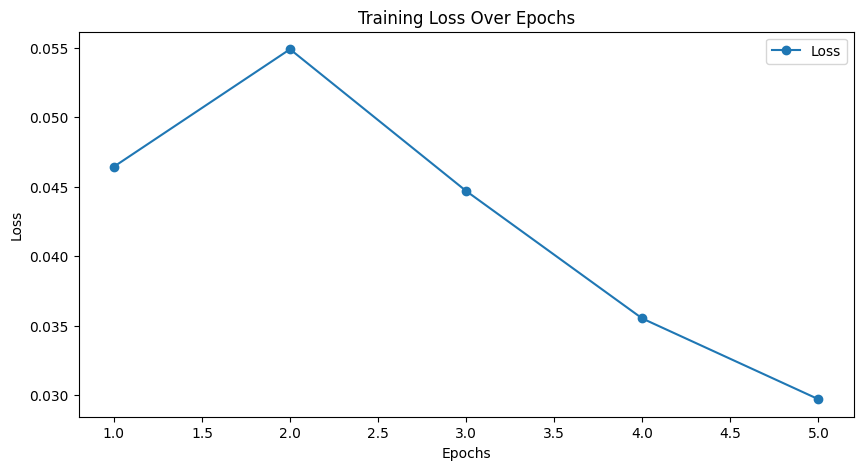

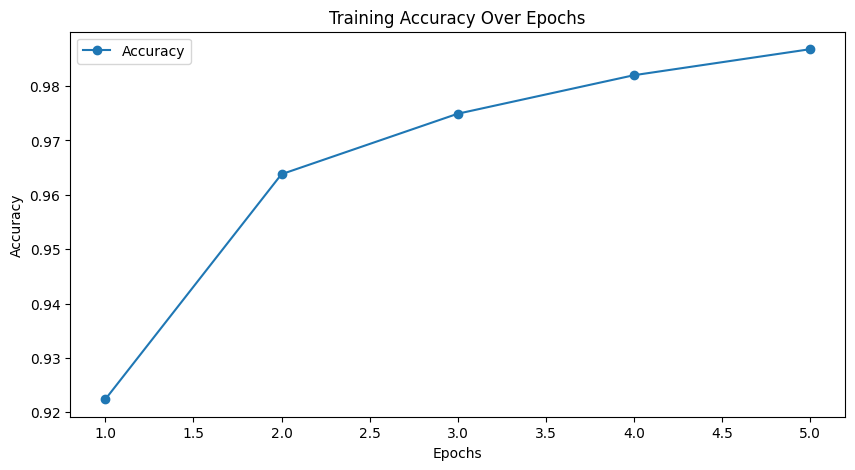

In [26]:
#!pip install matplotlib

import matplotlib.pyplot as plt

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), custom_callback.epoch_losses, label="Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), custom_callback.epoch_accuracies, label="Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()
plt.show()

<details>
<summary>Click here for solution</summary> </br>

```python
# Import necessary libraries
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.callbacks import Callback 

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
x_train = x_train / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32) 

# Step 2: Define the Model
model = Sequential([ 
    tf.keras.Input(shape=(28, 28)),  # Updated Input layer syntax
    Flatten(), 
    Dense(128, activation='relu'), 
    Dense(10) 
]) 

# Step 3: Define Loss Function, Optimizer, and Metric
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer = tf.keras.optimizers.Adam() 
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy() 

# Step 4: Implement the Custom Callback
class CustomCallback(Callback): 
    def on_epoch_end(self, epoch, logs=None): 
        print(f'End of epoch {epoch + 1}, loss: {logs.get("loss")}, accuracy: {logs.get("accuracy")}') 

# Step 5: Implement the Custom Training Loop with Custom Callback
custom_callback = CustomCallback() 

for epoch in range(5): 
    for x_batch, y_batch in train_dataset: 
        with tf.GradientTape() as tape: 
            logits = model(x_batch, training=True) 
            loss = loss_fn(y_batch, logits) 
        grads = tape.gradient(loss, model.trainable_weights) 
        optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
        accuracy_metric.update_state(y_batch, logits) 
    custom_callback.on_epoch_end(epoch, logs={'loss': loss.numpy(), 'accuracy': accuracy_metric.result().numpy()}) 
    accuracy_metric.reset_state()  # Updated method



### Exercise 4: Lab - Hyperparameter Tuning 

#### Enhancement: Add functionality to save the results of each hyperparameter tuning iteration as JSON files in a specified directory. 

#### Additional Instructions:

Modify the tuning loop to save each iteration's results as JSON files.

Specify the directory where these JSON files will be stored for easier retrieval and analysis of tuning results.


In [28]:
import os
import json
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Define directory to store tuning results
results_dir = "hyperparameter_results"
os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a batched dataset
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

def tune_hyperparameters(learning_rate, num_units, num_epochs):
    """
    Train a simple neural network with specified hyperparameters
    and save results to a JSON file.
    
    Parameters:
        learning_rate (float): Learning rate for the optimizer.
        num_units (int): Number of neurons in the hidden layer.
        num_epochs (int): Number of training epochs.
    """

    # Define the model with hyperparameters
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
        Dense(num_units, activation='relu'),  # Hidden layer with tunable units
        Dense(10)  # Output layer with 10 neurons (digits 0-9)
    ])

    # Define loss, optimizer, and metric
    loss_fn = SparseCategoricalCrossentropy(from_logits=True)
    optimizer = Adam(learning_rate=learning_rate)
    accuracy_metric = SparseCategoricalAccuracy()

    # Training loop
    results = {
        "learning_rate": learning_rate,
        "num_units": num_units,
        "num_epochs": num_epochs,
        "epoch_results": []
    }

    for epoch in range(num_epochs):
        print(f"\n🔹 Start of Epoch {epoch + 1}")

        # Reset accuracy at the start of each epoch
        accuracy_metric.reset_state()

        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                # Forward pass
                logits = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, logits)

            # Compute and apply gradients
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            # Update accuracy
            accuracy_metric.update_state(y_batch_train, logits)

        # Store epoch results
        epoch_data = {
            "epoch": epoch + 1,
            "loss": float(loss_value.numpy()),
            "accuracy": float(accuracy_metric.result().numpy())
        }
        results["epoch_results"].append(epoch_data)

        # Print epoch summary
        print(f"🔹 End of Epoch {epoch + 1}: Loss = {epoch_data['loss']:.4f}, Accuracy = {epoch_data['accuracy']:.4f}")

    # Save results as a JSON file
    results_filename = f"results_lr{learning_rate}_units{num_units}_epochs{num_epochs}.json"
    results_path = os.path.join(results_dir, results_filename)

    with open(results_path, "w") as json_file:
        json.dump(results, json_file, indent=4)

    print(f"✅ Hyperparameter tuning results saved to {results_path}")

# Define different hyperparameter combinations to test
hyperparameter_configs = [
    {"learning_rate": 0.001, "num_units": 64, "num_epochs": 5},
    {"learning_rate": 0.0005, "num_units": 128, "num_epochs": 5},
    {"learning_rate": 0.0001, "num_units": 256, "num_epochs": 5}
]

# Run tuning for each hyperparameter set
for config in hyperparameter_configs:
    tune_hyperparameters(config["learning_rate"], config["num_units"], config["num_epochs"])

import glob

# Get all JSON result files
result_files = glob.glob(os.path.join(results_dir, "*.json"))

# Print available result files
print("\n🔹 Available tuning result files:")
for file in result_files:
    print(file)

# Load and display one result file
with open(result_files[0], "r") as json_file:
    data = json.load(json_file)
    print("\n🔹 Sample tuning result:", json.dumps(data, indent=4))



🔹 Start of Epoch 1
🔹 End of Epoch 1: Loss = 0.0777, Accuracy = 0.9111

🔹 Start of Epoch 2
🔹 End of Epoch 2: Loss = 0.0507, Accuracy = 0.9541

🔹 Start of Epoch 3
🔹 End of Epoch 3: Loss = 0.0424, Accuracy = 0.9666

🔹 Start of Epoch 4
🔹 End of Epoch 4: Loss = 0.0340, Accuracy = 0.9744

🔹 Start of Epoch 5
🔹 End of Epoch 5: Loss = 0.0239, Accuracy = 0.9794
✅ Hyperparameter tuning results saved to hyperparameter_results/results_lr0.001_units64_epochs5.json

🔹 Start of Epoch 1
🔹 End of Epoch 1: Loss = 0.0615, Accuracy = 0.9099

🔹 Start of Epoch 2
🔹 End of Epoch 2: Loss = 0.0488, Accuracy = 0.9554

🔹 Start of Epoch 3


2025-03-04 14:45:29.258506: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


🔹 End of Epoch 3: Loss = 0.0524, Accuracy = 0.9685

🔹 Start of Epoch 4
🔹 End of Epoch 4: Loss = 0.0498, Accuracy = 0.9760

🔹 Start of Epoch 5
🔹 End of Epoch 5: Loss = 0.0353, Accuracy = 0.9809
✅ Hyperparameter tuning results saved to hyperparameter_results/results_lr0.0005_units128_epochs5.json

🔹 Start of Epoch 1
🔹 End of Epoch 1: Loss = 0.1353, Accuracy = 0.8679

🔹 Start of Epoch 2
🔹 End of Epoch 2: Loss = 0.0818, Accuracy = 0.9308

🔹 Start of Epoch 3
🔹 End of Epoch 3: Loss = 0.0585, Accuracy = 0.9444

🔹 Start of Epoch 4
🔹 End of Epoch 4: Loss = 0.0457, Accuracy = 0.9529

🔹 Start of Epoch 5
🔹 End of Epoch 5: Loss = 0.0380, Accuracy = 0.9599
✅ Hyperparameter tuning results saved to hyperparameter_results/results_lr0.0001_units256_epochs5.json

🔹 Available tuning result files:
hyperparameter_results/results_lr0.0001_units256_epochs5.json
hyperparameter_results/results_lr0.0005_units128_epochs5.json
hyperparameter_results/results_lr0.001_units64_epochs5.json

🔹 Sample tuning result: {
 

<details>
<summary>Click here for solution</summary> </br>

```python
!pip install keras-tuner
!pip install scikit-learn

import json
import os
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Load your dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Step 2: Define the model-building function
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification example
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 3: Initialize a Keras Tuner RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Set the number of trials
    executions_per_trial=1,  # Set how many executions per trial
    directory='tuner_results',  # Directory for saving logs
    project_name='hyperparam_tuning'
)

# Step 4: Run the tuner search (make sure the data is correct)
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

# Step 5: Save the tuning results as JSON files
try:
    for i in range(10):
        # Fetch the best hyperparameters from the tuner
        best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
        
        # Results dictionary to save hyperparameters and score
        results = {
            "trial": i + 1,
            "hyperparameters": best_hps.values,  # Hyperparameters tuned in this trial
            "score": None  # Add any score or metrics if available
        }

        # Save the results as JSON
        with open(os.path.join('tuning_results', f"trial_{i + 1}.json"), "w") as f:
            json.dump(results, f)

except IndexError:
    print("Tuning process has not completed or no results available.")
 ```   

</details>


### Exercise 5: Explanation of Hyperparameter Tuning

**Addition to Explanation:** Add a note explaining the purpose of num_trials in the hyperparameter tuning context:


In [ ]:
# Write your code here


<details>
<summary>Click here for solution</summary> </br>

```python
Explanation: "num_trials specifies the number of top hyperparameter sets to return. Setting num_trials=1 means that it will return only the best set of hyperparameters found during the tuning process."
 ```   

</details>


### Conclusion: 

Congratulations on completing this lab! You have now successfully created, trained, and evaluated a simple neural network model using the Keras Functional API. This foundational knowledge will allow you to build more complex models and explore advanced functionalities in Keras. 


Copyright © IBM Corporation. All rights reserved.
